### Probability vs Statistics (Fair coin test)

Known Parameters: Number of Flips (n) = 10, Probability of Heads (p) = 0.5
The probability of getting exactly 5 heads is: 0.24609375
The probability distribution shows the likelihood of each outcome:
  P(k=0) = 0.0010
  P(k=1) = 0.0098
  P(k=2) = 0.0439
  P(k=3) = 0.1172
  P(k=4) = 0.2051
  P(k=5) = 0.2461
  P(k=6) = 0.2051
  P(k=7) = 0.1172
  P(k=8) = 0.0439
  P(k=9) = 0.0098
  P(k=10) = 0.0010


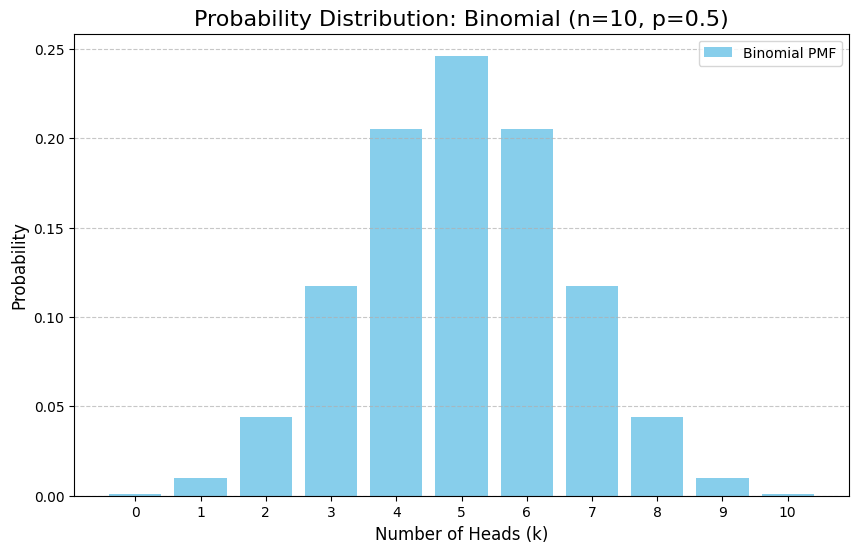

Observed Data: Number of Trials = 100, Observed Heads = 60
Statistical Estimate of p (p-hat) = 0.60
The calculated z-score is: 2.00
The p-value is: 0.0455

Interpretation: Since the p-value is less than 0.05, we have evidence to reject the hypothesis that the coin is fair. The data suggests the true probability of heads is not 0.5.

In summary: We used observed data to infer and test a claim about an unknown parameter (p).


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def run_prob_vs_stats_example() -> None :

    num_flips = 10        
    prob_heads = 0.5       
    outcomes = np.arange(0, num_flips + 1)
    probabilities = stats.binom.pmf(outcomes, num_flips, prob_heads)
    
    print(f"Known Parameters: Number of Flips (n) = {num_flips}, Probability of Heads (p) = {prob_heads}")
    
    print("The probability of getting exactly 5 heads is:", probabilities[5])
    print("The probability distribution shows the likelihood of each outcome:")
    for k, p in zip(outcomes, probabilities):
        print(f"  P(k={k}) = {p:.4f}")
    
    plt.figure(figsize=(10, 6))
    plt.bar(outcomes, probabilities, color='skyblue', label='Binomial PMF')
    plt.title('Probability Distribution: Binomial (n=10, p=0.5)', fontsize=16)
    plt.xlabel('Number of Heads (k)', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(outcomes)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    num_trials = 100
    observed_heads = 60
    p_hat = observed_heads / num_trials
    
    print(f"Observed Data: Number of Trials = {num_trials}, Observed Heads = {observed_heads}")
    print(f"Statistical Estimate of p (p-hat) = {p_hat:.2f}")
    
    standard_error = np.sqrt((0.5 * (1 - 0.5)) / num_trials)
    z_score = (p_hat - 0.5) / standard_error
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
    
    print(f"The calculated z-score is: {z_score:.2f}")
    print(f"The p-value is: {p_value:.4f}")
    
    if p_value < 0.05:
        print("\nInterpretation: Since the p-value is less than 0.05, we have evidence to reject the hypothesis that the coin is fair. The data suggests the true probability of heads is not 0.5.")
    else:
        print("\nInterpretation: The p-value is not significant. There is not enough evidence to conclude the coin is unfair.")
        
    print("\nIn summary: We used observed data to infer and test a claim about an unknown parameter (p).")

run_prob_vs_stats_example()

### Discrete and Continues Random Variables

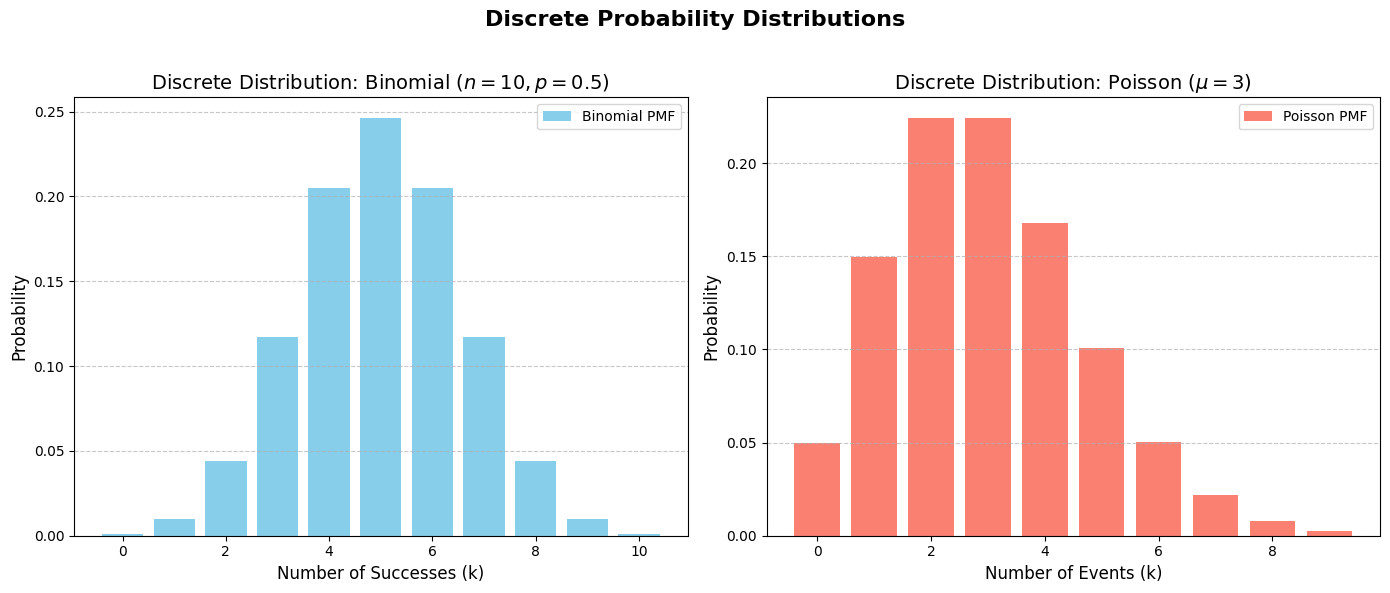

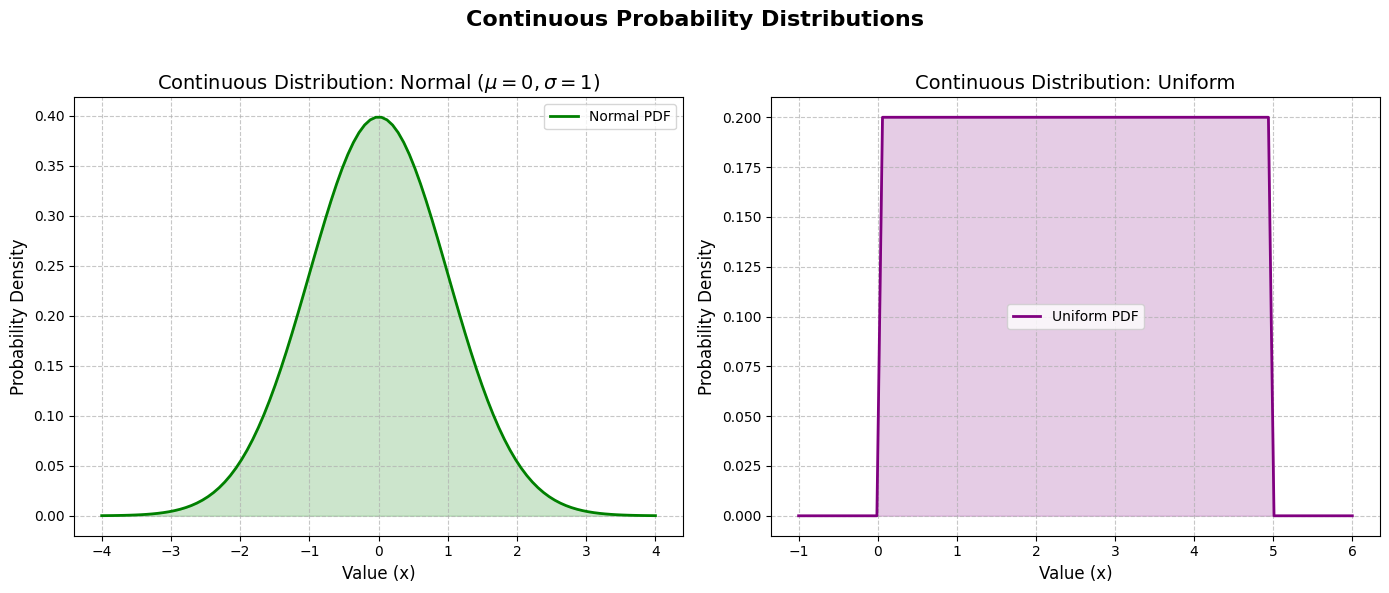

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, poisson, uniform

def plot_distributions() -> None:

    n_binom, p_binom = 10, 0.5
    x_binom = np.arange(0, n_binom + 1)
    pmf_binom = binom.pmf(x_binom, n_binom, p_binom)

    mu_poisson = 3
    x_poisson = np.arange(0, 10)
    pmf_poisson = poisson.pmf(x_poisson, mu_poisson)

    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    ax1.bar(x_binom, pmf_binom, color='skyblue', label='Binomial PMF')
    ax1.set_title(r'Discrete Distribution: Binomial ($n=10, p=0.5$)', fontsize=14)
    ax1.set_xlabel('Number of Successes (k)', fontsize=12)
    ax1.set_ylabel('Probability', fontsize=12)
    ax1.grid(axis='y', linestyle='--', alpha=0.7)
    ax1.legend()

    ax2.bar(x_poisson, pmf_poisson, color='salmon', label='Poisson PMF')
    ax2.set_title(r'Discrete Distribution: Poisson ($\mu=3$)', fontsize=14)
    ax2.set_xlabel('Number of Events (k)', fontsize=12)
    ax2.set_ylabel('Probability', fontsize=12)
    ax2.grid(axis='y', linestyle='--', alpha=0.7)
    ax2.legend()

    plt.suptitle('Discrete Probability Distributions', fontsize=16, weight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    mu_norm, sigma_norm = 0, 1
    x_norm = np.linspace(mu_norm - 4*sigma_norm, mu_norm + 4*sigma_norm, 100)
    pdf_norm = norm.pdf(x_norm, mu_norm, sigma_norm)

    loc_uniform, scale_uniform = 0, 5
    x_uniform = np.linspace(-1, 6, 100)
    pdf_uniform = uniform.pdf(x_uniform, loc=loc_uniform, scale=scale_uniform)

    _, (ax3, ax4) = plt.subplots(1, 2, figsize=(14, 6))

    ax3.plot(x_norm, pdf_norm, color='green', linestyle='-', linewidth=2, label='Normal PDF')
    ax3.fill_between(x_norm, pdf_norm, color='green', alpha=0.2)
    ax3.set_title(r'Continuous Distribution: Normal ($\mu=0, \sigma=1$)', fontsize=14)
    ax3.set_xlabel('Value (x)', fontsize=12)
    ax3.set_ylabel('Probability Density', fontsize=12)
    ax3.grid(True, linestyle='--', alpha=0.7)
    ax3.legend()

    ax4.plot(x_uniform, pdf_uniform, color='purple', linestyle='-', linewidth=2, label='Uniform PDF')
    ax4.fill_between(x_uniform, pdf_uniform, color='purple', alpha=0.2)
    ax4.set_title('Continuous Distribution: Uniform', fontsize=14)
    ax4.set_xlabel('Value (x)', fontsize=12)
    ax4.set_ylabel('Probability Density', fontsize=12)
    ax4.grid(True, linestyle='--', alpha=0.7)
    ax4.legend()

    plt.suptitle('Continuous Probability Distributions', fontsize=16, weight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_distributions()

### Summary Statistics and Momentums

In [3]:
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt 

def compute_and_plot_empirical_moments_1d(
        data_array: np.ndarray, 
        theoretical_mean: float, 
        theoretical_variance: float,
        theoretical_skewness: float,
        theoretical_kurtosis: float) -> None:

    mean_array = []
    var_array = []
    skew_array = []
    kurtosis_array = [] 
    for sample_index in range(1, len(data_array) + 1):
        if sample_index < 2:
            mean = np.nan
            variance = np.nan
            skewness_value = np.nan
            kurtosis_value = np.nan
        else:
            subset = data_array[:sample_index]
            mean = np.mean(subset)
            variance = np.var(subset, ddof=1)
            skewness_value = skew(subset)
            kurtosis_value = kurtosis(subset)

        mean_array.append(mean)
        var_array.append(variance)
        skew_array.append(skewness_value)
        kurtosis_array.append(kurtosis_value)

    x_values = range(1, len(data_array) + 1)
    
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    fig.suptitle('Convergence of Empirical Moments to Theoretical Values', fontsize=18)

    plots = {
        'Mean': {'data': mean_array, 'theoretical': theoretical_mean, 'color': 'b', 'ylim': (-0.5, 0.5)},
        'Variance': {'data': var_array, 'theoretical': theoretical_variance, 'color': 'g', 'ylim': (0, 2)},
        'Skewness': {'data': skew_array, 'theoretical': theoretical_skewness, 'color': 'm', 'ylim': (-1, 1)},
        'Kurtosis': {'data': kurtosis_array, 'theoretical': theoretical_kurtosis, 'color': 'c', 'ylim': (-1, 1)}
    }

    for (i, (title, values)) in enumerate(plots.items()):
        ax = axs[i // 2, i % 2]
        ax.plot(x_values, values['data'], label=f'Empirical {title}', color=values['color'])
        ax.axhline(y=values['theoretical'], color='r', linestyle='--', label=f'Theoretical {title} ({values["theoretical"]})')
        ax.set_title(f'Convergence of {title}')
        ax.set_xlabel('Number of Data Points')
        ax.set_ylabel(f'{title} Value')
        ax.legend()

    plt.tight_layout()
    plt.show()

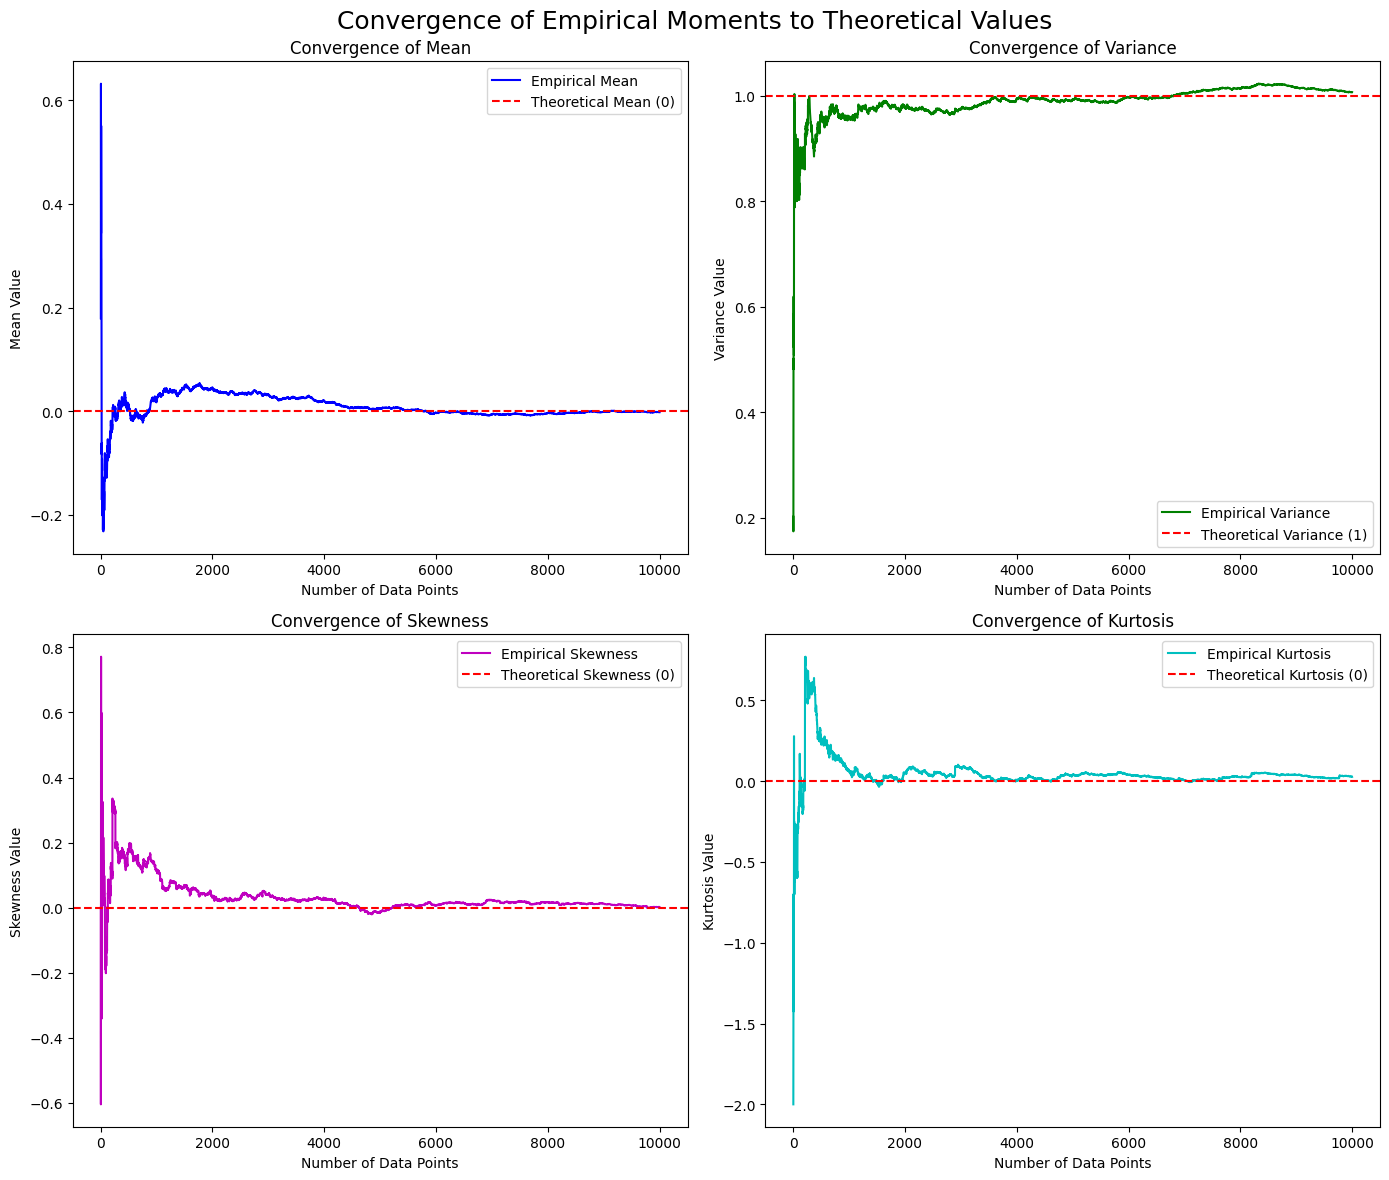

In [4]:
np.random.seed(42)
data_points = 10000
data = np.random.randn(data_points)
compute_and_plot_empirical_moments_1d(
    data_array=data, 
    theoretical_mean=0, 
    theoretical_variance=1, 
    theoretical_kurtosis=0, 
    theoretical_skewness=0)

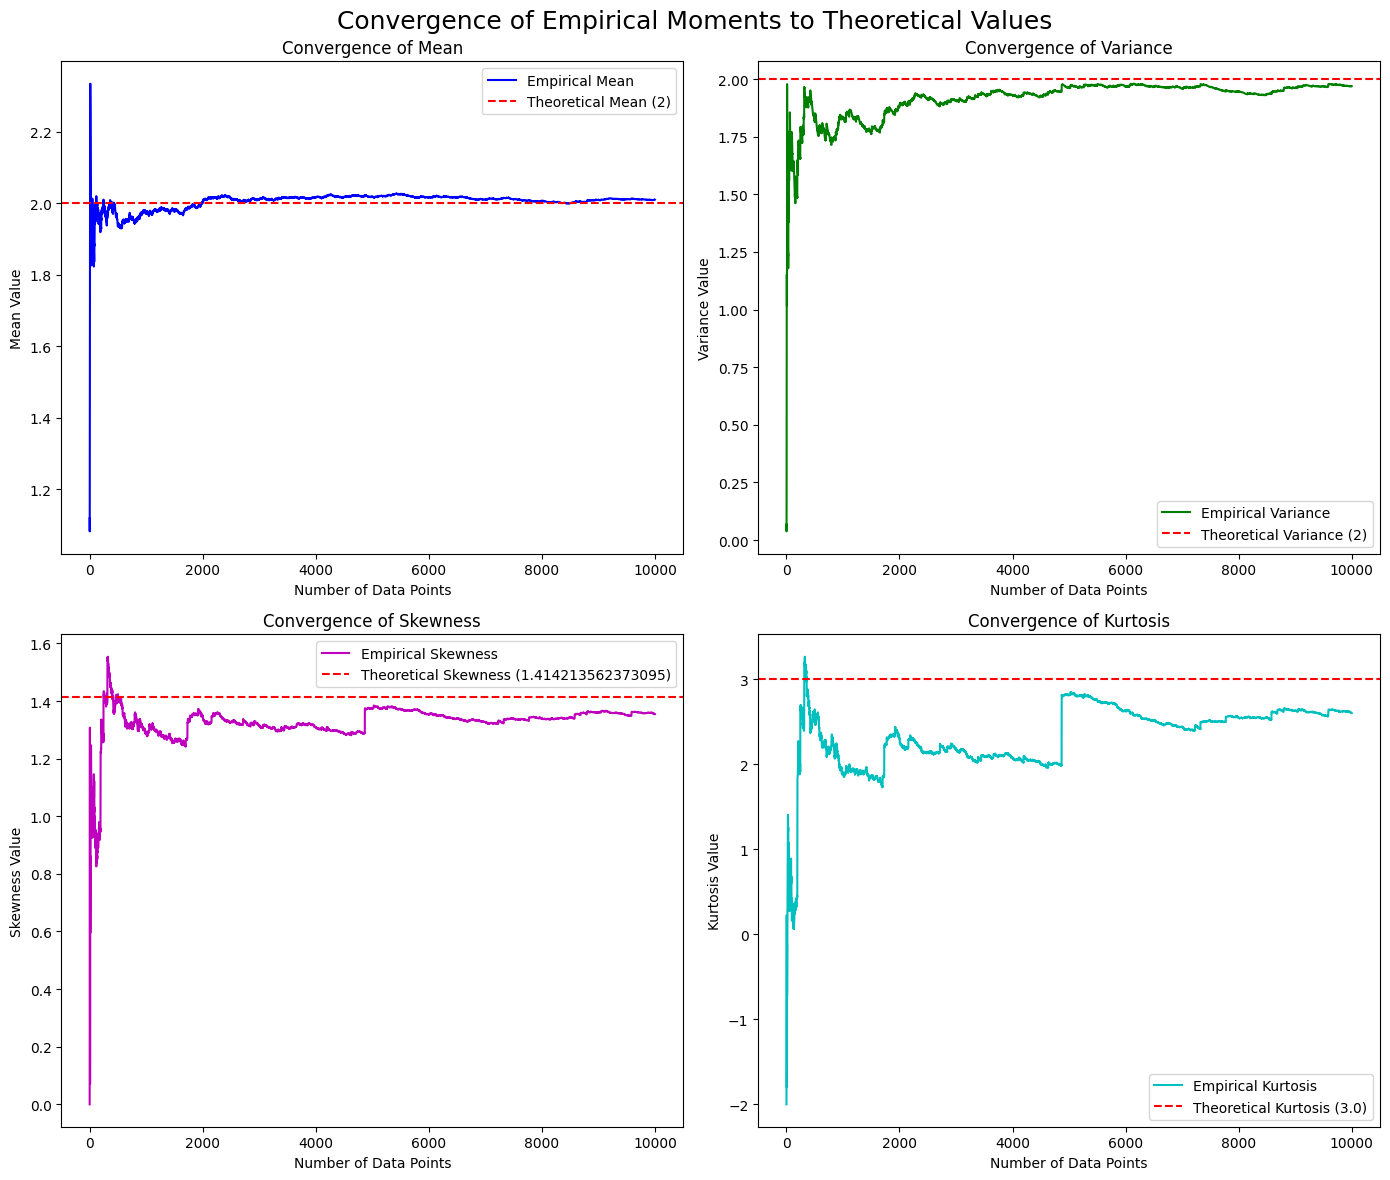

In [5]:
shape = 2
scale = 1
data = np.random.gamma(shape=2, scale=1, size=data_points)
theoretical_mean = shape * scale
theoretical_var = shape * (scale**2)
theoretical_skewness = 2 / np.sqrt(shape)
theoretical_kurtosis = 6 / shape

compute_and_plot_empirical_moments_1d(
    data_array=data, 
    theoretical_mean=theoretical_mean, 
    theoretical_variance=theoretical_var, 
    theoretical_skewness=theoretical_skewness, 
    theoretical_kurtosis=theoretical_kurtosis
)

### Statistical Independence 

The covariance between Variable A and Variable B is: 0.0025
A value close to 0 indicates a lack of linear relationship, which is a key sign of independence.
P(A > 0.7): 0.2880
P(B > 0.7): 0.3070
P(A > 0.7) * P(B > 0.7): 0.0884
P(A > 0.7 AND B > 0.7): 0.0970


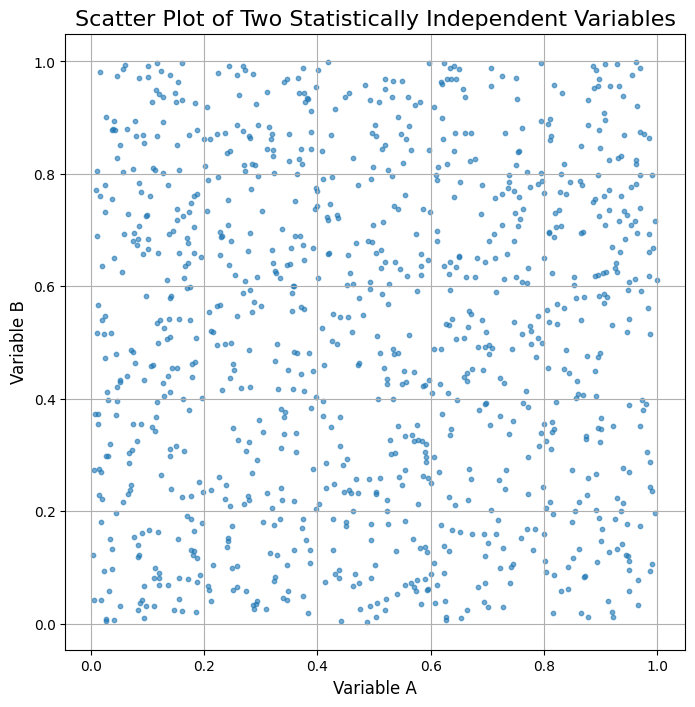

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
data_points = 1000
variable_A = np.random.rand(data_points)
variable_B = np.random.rand(data_points)

covariance_matrix = np.cov(variable_A, variable_B)
covariance_AB = covariance_matrix[0, 1]

print(f"The covariance between Variable A and Variable B is: {covariance_AB:.4f}")
print("A value close to 0 indicates a lack of linear relationship, which is a key sign of independence.")

threshold = 0.7
prob_A = np.mean(variable_A > threshold)
prob_B = np.mean(variable_B > threshold)
prob_A_and_B = np.mean((variable_A > threshold) & (variable_B > threshold))
product_of_probs = prob_A * prob_B

print(f"P(A > {threshold}): {prob_A:.4f}")
print(f"P(B > {threshold}): {prob_B:.4f}")
print(f"P(A > {threshold}) * P(B > {threshold}): {product_of_probs:.4f}")
print(f"P(A > {threshold} AND B > {threshold}): {prob_A_and_B:.4f}")
plt.figure(figsize=(8, 8))
plt.scatter(variable_A, variable_B, alpha=0.6, s=10)
plt.title('Scatter Plot of Two Statistically Independent Variables', fontsize=16)
plt.xlabel('Variable A', fontsize=12)
plt.ylabel('Variable B', fontsize=12)
plt.grid(True)
plt.show()

In [7]:
covariance_AB

np.float64(0.0025018588628563407)

### 2D Gaussian Countours

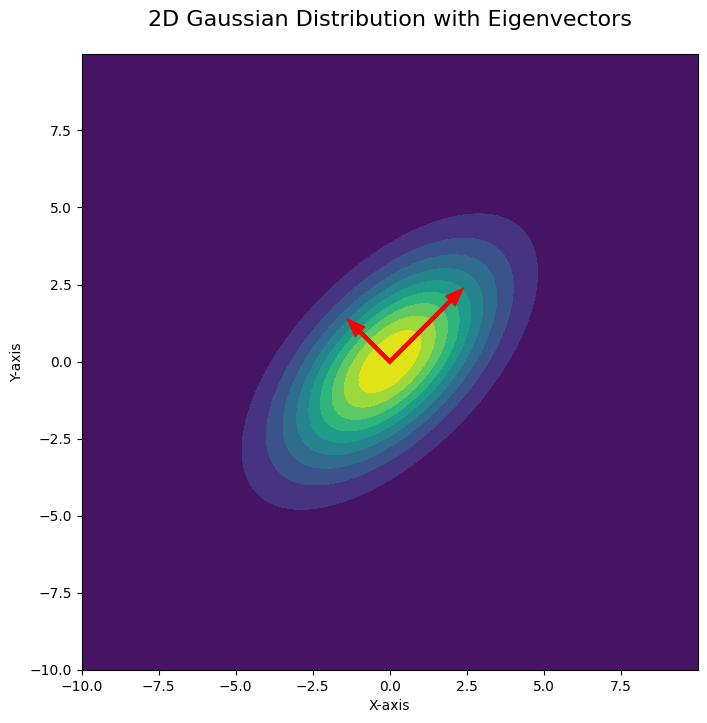

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

mu = np.array([0, 0])
sigma = np.array([
    [5, 3],  
    [3, 5]   
])

eigenvalues, eigenvectors = np.linalg.eigh(sigma)
eigenvector_lengths = np.sqrt(eigenvalues)

x, y = np.mgrid[-10:10:.01, -10:10:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(mu, sigma)
z = rv.pdf(pos)
fig, ax = plt.subplots(figsize=(8, 8))
ax.contourf(x, y, z, levels=10, cmap='viridis')

for i in range(len(eigenvectors)):
    v = eigenvectors[:, i] * eigenvector_lengths[i] 
    ax.arrow(
        mu[0], mu[1], v[0], v[1],
        head_width=0.3, head_length=0.4, fc='red', ec='red', linewidth=3
    )
    
ax.set_title(
    '2D Gaussian Distribution with Eigenvectors',
    fontsize=16,
    pad=20
)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_aspect('equal', adjustable='box')
plt.show()

#### Affine Transformation of Gaussian Distribution

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def affine_transformation(A: np.ndarray, t: np.ndarray, points: np.ndarray) -> np.ndarray:

    T = np.identity(3)
    T[:2, :2] = A  
    T[:2, 2] = t   
    points_homogeneous = np.hstack((points, np.ones((points.shape[0], 1))))
    
    transformed_points_homogeneous = points_homogeneous @ T.T
    return transformed_points_homogeneous[:, :2]

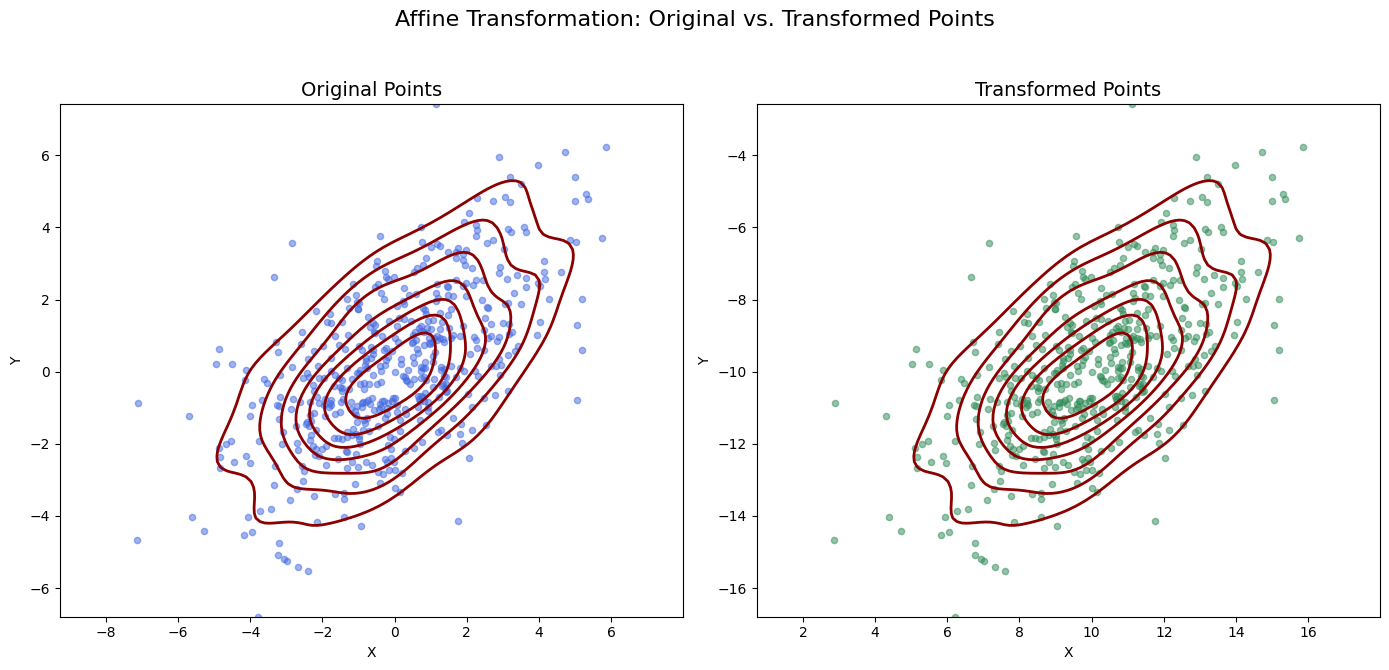

In [10]:
num_points = 500
initial_points = np.random.multivariate_normal(mu, sigma, num_points)
A = np.array([
    [1, 0],
    [0, 1]
])

t = np.array([10, -10])
transformed_points = affine_transformation(A, t, initial_points)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle('Affine Transformation: Original vs. Transformed Points', fontsize=16)
kde = gaussian_kde(initial_points.T)

x_min, x_max = initial_points[:, 0].min(), initial_points[:, 0].max()
y_min, y_max = initial_points[:, 1].min(), initial_points[:, 1].max()
x_grid, y_grid = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])
z = np.reshape(kde(positions).T, x_grid.shape)

ax1.set_title('Original Points', fontsize=14)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.scatter(initial_points[:, 0], initial_points[:, 1], alpha=0.5, s=20, color='royalblue')
ax1.contour(x_grid, y_grid, z, colors='darkred', linewidths=2)
ax1.axis('equal')

kde_transformed = gaussian_kde(transformed_points.T)
x_min_t, x_max_t = transformed_points[:, 0].min(), transformed_points[:, 0].max()
y_min_t, y_max_t = transformed_points[:, 1].min(), transformed_points[:, 1].max()
x_grid_t, y_grid_t = np.mgrid[x_min_t:x_max_t:100j, y_min_t:y_max_t:100j]
positions_t = np.vstack([x_grid_t.ravel(), y_grid_t.ravel()])
z_t = np.reshape(kde_transformed(positions_t).T, x_grid_t.shape)

ax2.set_title('Transformed Points', fontsize=14)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.scatter(transformed_points[:, 0], transformed_points[:, 1], alpha=0.5, s=20, color='seagreen')
ax2.contour(x_grid_t, y_grid_t, z_t, colors='darkred', linewidths=2)
ax2.axis('equal') 

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Linear Regression 

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from typing import Tuple, Union
import matplotlib

def generate_linearly_dependent_data(a: float, b: float, size: int, noise_var: float=1) -> Tuple[np.ndarray, np.ndarray]: 
    np.random.seed(42)
    X = 2 * np.random.rand(size, 1) 
    y = b + a * X + np.sqrt(noise_var) * np.random.randn(size, 1) 
    return X, y

def plot_Xy(X: np.ndarray, y: np.ndarray, show: bool=True) -> Union[None, matplotlib.axes.Axes]:
    _, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(X, y, label='Original Data Points')
    ax.set_title('Linear Regression Problem', fontsize=16)
    ax.set_xlabel('Independent Variable (X)', fontsize=16)
    ax.set_ylabel('Dependent Variable (y)', fontsize=16)
    ax.legend()
    ax.grid(True)
    if show:
        plt.show()
    else:
        return ax

def visualize_prediction(X: np.ndarray, y: np.ndarray, X_pred: np.ndarray, y_pred: np.ndarray) -> None:
    ax = plot_Xy(X, y, show=False)
    ax.plot(X_pred, y_pred, 'r-', linewidth=3, label='Fitted Regression Line')
    plt.show()


def fit_linear_regression_model(X: np.ndarray, y: np.ndarray) -> LinearRegression:
    model = LinearRegression()
    model.fit(X, y)
    return model 

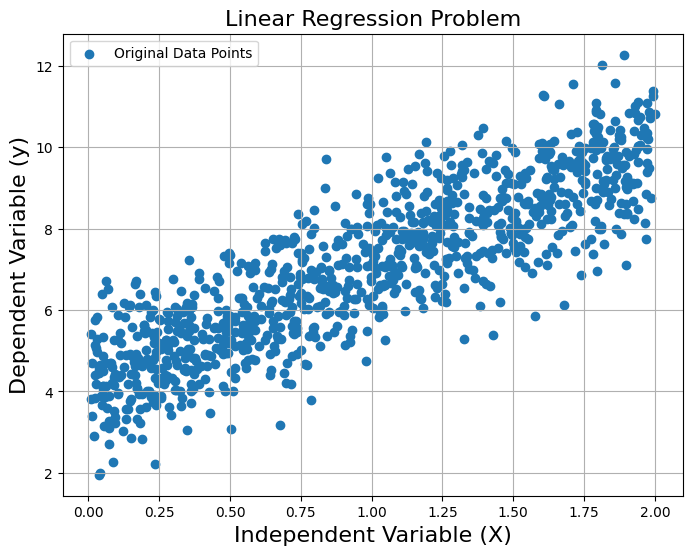

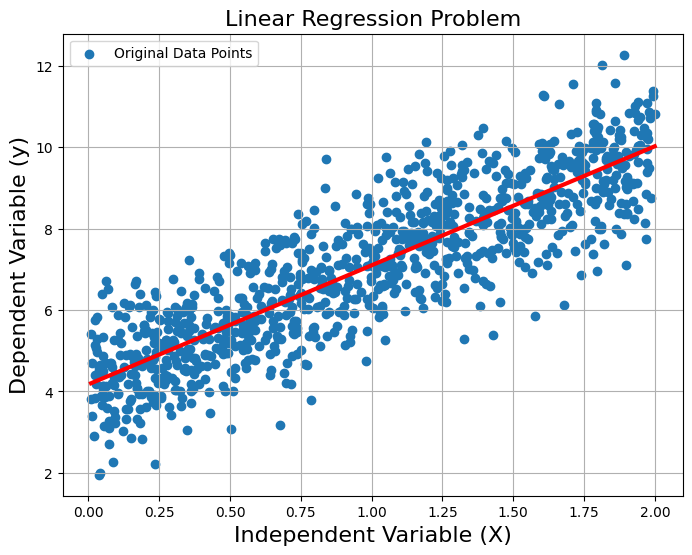

The best-fit line parameters are:
Slope (m): 2.9226
Intercept (c): 4.1748


In [12]:
X_train, y_train = generate_linearly_dependent_data(a=3, b=4, size=1000)
plot_Xy(X_train, y_train)
model = fit_linear_regression_model(X_train, y_train)
slope = model.coef_[0][0]
intercept = model.intercept_[0]
x_line = np.linspace(np.min(X_train), np.max(X_train), 500)
y_line = slope * x_line + intercept
visualize_prediction(X_train, y_train, x_line, y_line)
print(f"The best-fit line parameters are:")
print(f"Slope (m): {slope:.4f}")
print(f"Intercept (c): {intercept:.4f}")

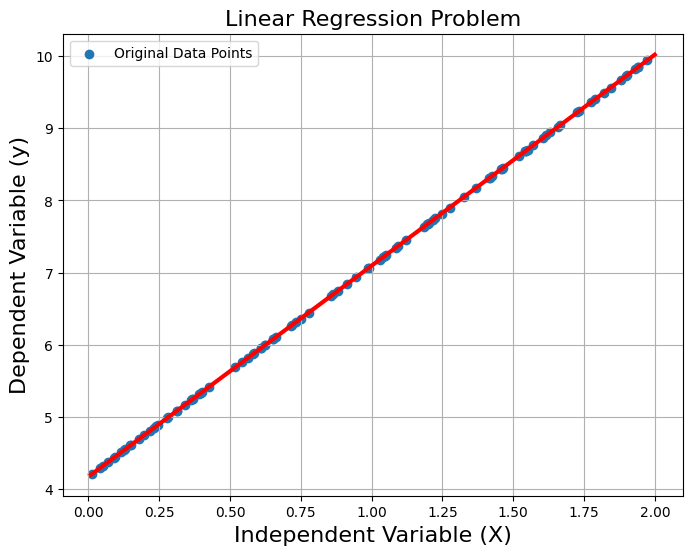

In [13]:
X_test, y_test = generate_linearly_dependent_data(a=3, b=4, size=100)
y_pred = model.predict(X_test)
visualize_prediction(X_test, y_pred, x_line, y_line)

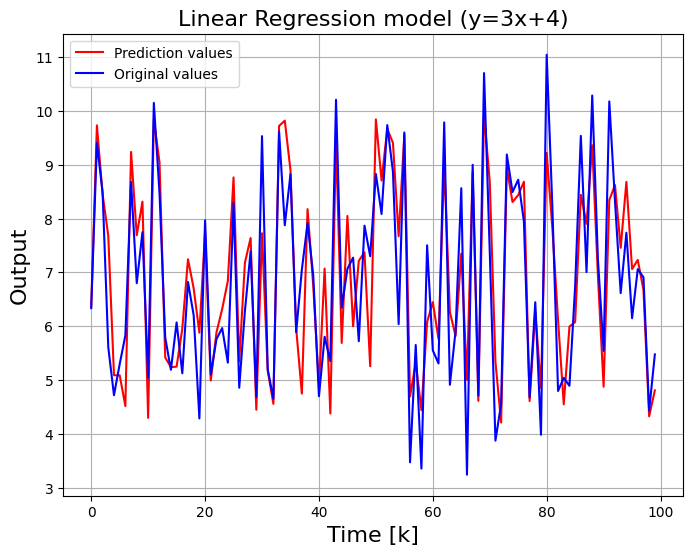

In [14]:
def plot_res(y_true: np.ndarray, y_pred: np.ndarray) -> None: 
    _, ax = plt.subplots(figsize=(8, 6))
    ax.plot(y_pred, color='red', label="Prediction values")
    ax.plot(y_true, color='blue', label="Original values")
    ax.grid(True)
    ax.set_xlabel("Time [k]", fontsize=16)
    ax.set_ylabel("Output", fontsize=16)
    ax.set_title("Linear Regression model (y=3x+4)", fontsize=16)
    ax.legend()
    plt.show()
plot_res(y_test, y_pred)

In [15]:
mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
print(f"MSE for test data: {mse}")

MSE for test data: 0.8253605386133269


### Weighted LS

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

np.random.seed(42)
num_points = 100

x, y_true = generate_linearly_dependent_data(a=3, b=4, size=1000, noise_var=0)
sigma = 0.5 * x
noise = np.random.normal(0, sigma)
y = y_true + noise
X = sm.add_constant(x)
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()

print("--- OLS Results ---")
print(ols_results.summary())
print("\n")

ols_residuals = ols_results.resid
weights = 1 / (ols_residuals**2)
weights = weights / np.mean(weights)

--- OLS Results ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     2982.
Date:                Wed, 03 Sep 2025   Prob (F-statistic):          5.00e-302
Time:                        11:51:48   Log-Likelihood:                -1406.3
No. Observations:                1000   AIC:                             2817.
Df Residuals:                     998   BIC:                             2826.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1748      0.061

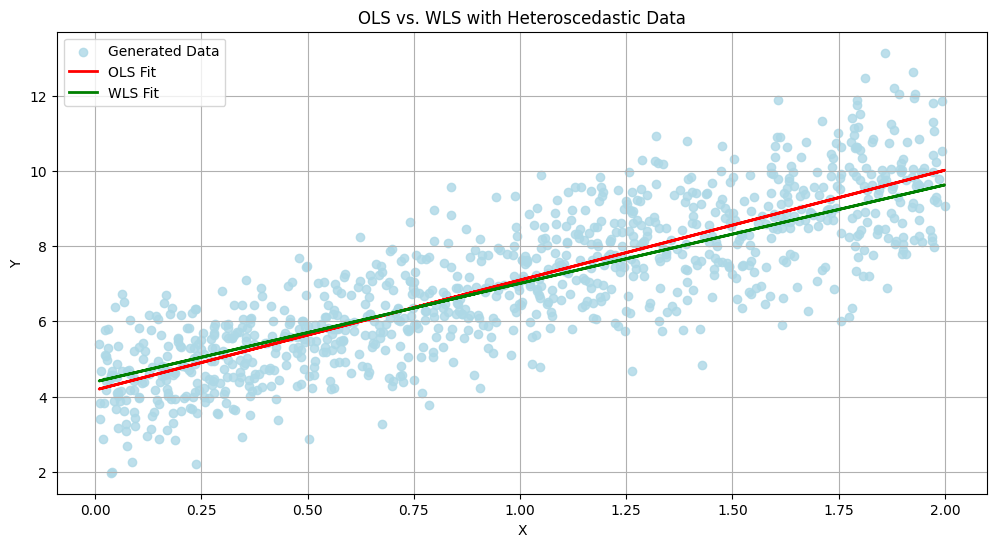


--- Final Comparison ---
OLS Estimated Slope: 2.9226, Std Error: 0.0535
WLS Estimated Slope: 2.6180, Std Error: 0.0178


In [38]:
wls_model = sm.WLS(y, X, weights=weights)
wls_results = wls_model.fit()

plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Generated Data', color='lightblue', alpha=0.8)

plt.plot(x, ols_results.fittedvalues, 'r-', label='OLS Fit', linewidth=2)
plt.plot(x, wls_results.fittedvalues, 'g-', label='WLS Fit', linewidth=2)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("OLS vs. WLS with Heteroscedastic Data")
plt.legend()
plt.grid(True)
plt.show()
print("\n--- Final Comparison ---")
print(f"OLS Estimated Slope: {ols_results.params[1]:.4f}, Std Error: {ols_results.bse[1]:.4f}")
print(f"WLS Estimated Slope: {wls_results.params[1]:.4f}, Std Error: {wls_results.bse[1]:.4f}")

### Linear Discriminant Function

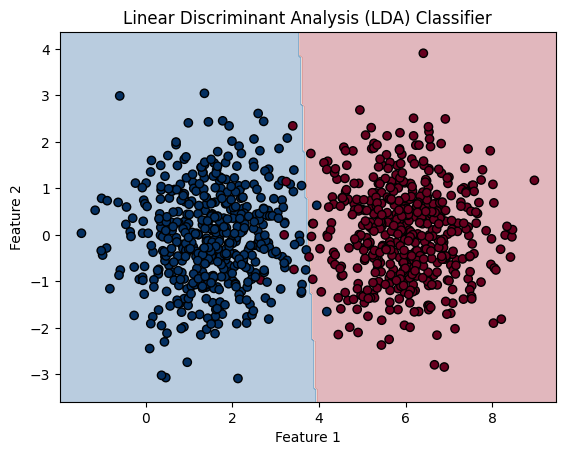

--- Estimated Parameters ---
Priors: [0.51142857 0.48857143]

Class-specific means (mu): 
[[ 6.01029175  0.06134104]
 [ 1.5236377  -0.11368531]]
Covariance matrix is:
  [[ 0.92116401 -0.01064937]
 [-0.01064937  0.94806243]]

--- Confusion Matrix ---
[[138   4]
 [  0 158]]

Accuracy: 0.9867


In [16]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


X, y = make_blobs(n_samples=1000, n_features=2, centers=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train, y_train)

h = 0.05
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolor='k')
plt.title("Linear Discriminant Analysis (LDA) Classifier")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print("--- Estimated Parameters ---")
print(f"Priors: {lda.priors_}")
print(f"\nClass-specific means (mu): \n{lda.means_}")

print(f"Covariance matrix is:\n  {lda.covariance_}")

y_pred = lda.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("\n--- Confusion Matrix ---")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

In [17]:
import sklearn
import matplotlib.pyplot as plt 
import numpy as np 

def visualize_decision_surface(
    estimator: sklearn.base.BaseEstimator, 
    X: np.ndarray, 
    y: np.ndarray
) -> None:
    
    h = 0.05
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolor='k')

    plt.title("Classifier Decision Surface")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()  

### Quadratic Discriminant Function

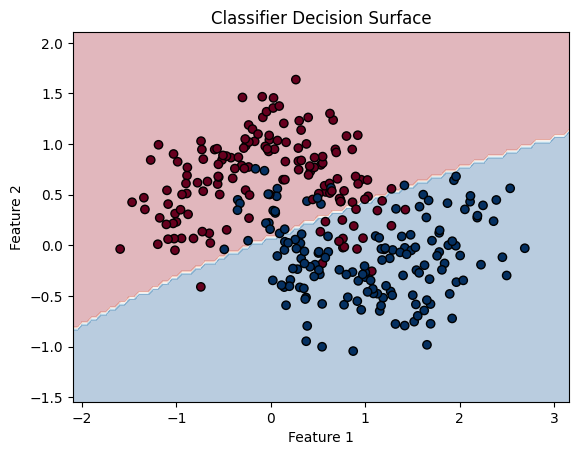

--- Estimated Parameters ---
Priors: [0.53333333 0.46666667]

Class-specific means (mu): 
[[-0.05635459  0.6301395 ]
 [ 0.97873068 -0.10915898]]

Covariance matrices (Sigma_k):

Class 0:
  [[0.53034162 0.01438716]
 [0.01438716 0.14875122]]

Class 1:
  [[ 0.63989501 -0.04605253]
 [-0.04605253  0.15391938]]

--- Confusion Matrix ---
[[33  5]
 [ 6 46]]

Accuracy: 0.8778


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, y_train)
visualize_decision_surface(qda, X, y)

print("--- Estimated Parameters ---")
print(f"Priors: {qda.priors_}")
print(f"\nClass-specific means (mu): \n{qda.means_}")

print("\nCovariance matrices (Sigma_k):")
for i, cov_matrix in enumerate(qda.covariance_):
    print(f"\nClass {i}:")
    print(f"  {cov_matrix}")

y_pred = qda.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("\n--- Confusion Matrix ---")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

### K-Nearest Neighbourhoods

--- KNN Model Evaluation (k=5) ---
Confusion Matrix:
[[30  2]
 [ 3 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       0.93      0.89      0.91        28

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



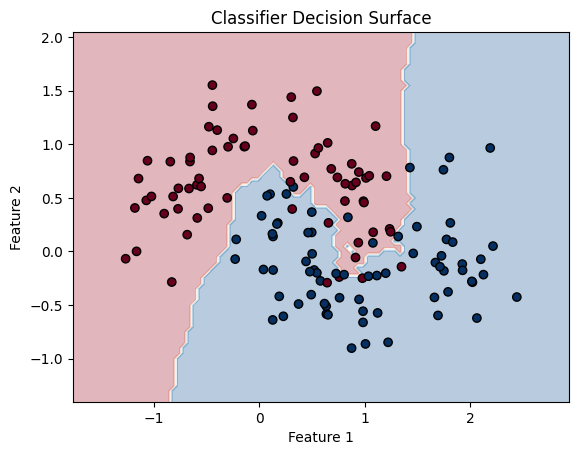

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

X, y = make_moons(n_samples=200, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

print("--- KNN Model Evaluation (k=5) ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

visualize_decision_surface(knn_classifier, X_train, y_train)